<a href="https://colab.research.google.com/github/shubham-k01/SDS_Exps/blob/main/STATS_EXP_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats 
from scipy.stats import chi2

**Question 1: For a give Titanic dataset, can it be concluded that gender and survival of passengers are related to each other?**

* Ho: Gender and survival of passengers are independent of each other
* Ha: Gender and survival of passengers are correlated

In [ ]:
data=pd.read_csv('/content/titanic.csv')

In [ ]:
data

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1
...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,0
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0
1310,"Zenni, Mr Philip",3rd,22.00,male,0
1311,"Lievens, Mr Rene",3rd,24.00,male,0


In [ ]:
df=pd.crosstab(index=data['Sex'],columns=data['Survived'])

In [ ]:
df

Survived,0,1
Sex,,
female,154,308
male,709,142


In [ ]:
c_t=sum(df.values)
r_t=sum(df.values.T)
t=sum(c_t)
obs_freq=[]
exp_freq=[]
chi2_stats=0
m=len(r_t)
n=len(c_t)
for i in range(m):
  for j in range(n):
    exp=r_t[i]*c_t[j]/t
    exp_freq.append(exp)
    obs=df.values[i][j]
    obs_freq.append(obs)
    chi2_stats=chi2_stats+((obs-exp)**2/exp)
print("Observed Frequency=",obs_freq)
print("Expected Frequency=",exp_freq)
print("Chi-Square statistics=",chi2_stats)
dof=(m-1)*(n-1)
p=chi2.sf(chi2_stats,dof)
print("p-value=",p)
alpha=0.05
if p<alpha:
  print("Reject Ho for LOS="+str(alpha))
else:
  print("Fail to reject Ho for LOS="+str(alpha))

Observed Frequency= [154, 308, 709, 142]
Expected Frequency= [303.66031987814165, 158.33968012185835, 559.3396801218584, 291.66031987814165]
Chi-Square statistics= 332.05702407732934
p-value= 3.4258545563697882e-74
Reject Ho for LOS=0.05


**Question 2: For a give Titanic dataset, can it be concluded that class and survival of passengers are related to each other?**

In [ ]:
df=pd.crosstab(index=data['PClass'],columns=data['Survived'])

In [ ]:
df

Survived,0,1
PClass,,
1st,129,193
2nd,160,119
3rd,573,138


In [ ]:
c_t=sum(df.values)
r_t=sum(df.values.T)
t=sum(c_t)
obs_freq=[]
exp_freq=[]
chi2_stats=0
m=len(r_t)
n=len(c_t)
for i in range(m):
  for j in range(n):
    exp=r_t[i]*c_t[j]/t
    exp_freq.append(exp)
    obs=df.values[i][j]
    obs_freq.append(obs)
    chi2_stats=chi2_stats+((obs-exp)**2/exp)
print("Observed Frequency=",obs_freq)
print("Expected Frequency=",exp_freq)
print("Chi-Square statistics=",chi2_stats)
dof=(m-1)*(n-1)
p=chi2.sf(chi2_stats,dof)
print("p-value=",p)
alpha=0.05
if p<alpha:
  print("Reject Ho for LOS="+str(alpha))
else:
  print("Fail to reject Ho for LOS="+str(alpha))

Observed Frequency= [129, 193, 160, 119, 573, 138]
Expected Frequency= [211.5579268292683, 110.4420731707317, 183.3064024390244, 95.6935975609756, 467.1356707317073, 243.8643292682927]
Chi-Square statistics= 172.51911553147184
p-value= 3.451040459491841e-38
Reject Ho for LOS=0.05


**Question 3: A table shows the number of men and women buying different types of pets. Can it be concluded that gender and choice of pet are related to each other?
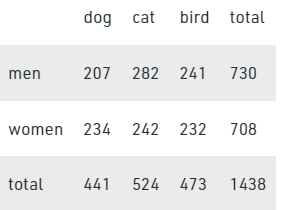**




* Ho:Gender and choice of pet are independent
* Ha:Gender and choice of pet are correlated

In [ ]:
from scipy.stats import chi2_contingency
data=[[207,282,241],[234,242,232]]
stats,p,dof,expected=chi2_contingency(data)

In [ ]:
print("Expected frequency = ",expected)
print("Chi2-statistics = ",stats)
print("p-value = ",p)
alpha=0.05
if p < alpha:
  print("Reject Ho for LOS = ",str(alpha))
else:
  print("Fail to reject Ho for LOS = ",str(alpha))
  critical_value=chi2.ppf(0.95,2)
  print (critical_value)

Expected frequency =  [[223.87343533 266.00834492 240.11821975]
 [217.12656467 257.99165508 232.88178025]]
Chi2-statistics =  4.542228269825232
p-value =  0.1031971404730939
Fail to reject Ho for LOS =  0.05
5.991464547107979


**Question 4: For the given drug data, can we conclude that treatment is effective?**

In [ ]:
df=pd.read_csv('/content/drugdata.csv')

In [ ]:
data

[[207, 282, 241], [234, 242, 232]]

In [ ]:
df

,treatments,cured,noncured
0,treated,60,10
1,nontreated,30,25


In [ ]:
data=df[['cured','noncured']]
data_arr=data.to_numpy()
stats,p,dof,expected=chi2_contingency(data_arr)
print("Expected frequency = ",expected)
print("Chi2-statistics = ",stats)
print("p-value = ",p)
alpha=0.05
if p < alpha:
  print("Reject Ho for LOS = ",str(alpha))
else:
  print("Fail to reject Ho for LOS = ",str(alpha))
  critical_value=chi2.ppf(0.95,1)
  print (critical_value)

Expected frequency =  [[50.4 19.6]
 [39.6 15.4]]
Chi2-statistics =  13.3364898989899
p-value =  0.0002602911116400899
Reject Ho for LOS =  0.05


**Question 5: The table below is an exit poll which displays the joint responses to 2 categorical variables: people in categories from 18–29, 30–44, 45–64 and >65 years, and their political affiliation, which is “Conservative”, “Socialist” and “Other”. Create data corresponding to this information. Is there any evidence of a relationship between the age group and their political affiliation, at 5% significant level?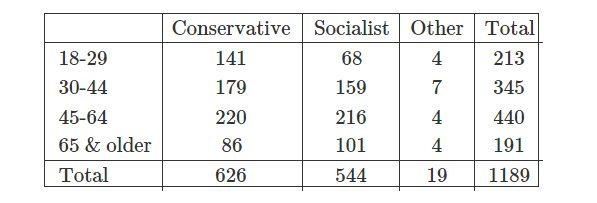**

* Ho: Age Group and political affiliation are independent
* Ha: Age group and political affiliation are related

In [ ]:
data=[[141,68,4],[179,159,7],[220,216,4],[86,101,4]]
stats,p,dof,expected=chi2_contingency(data)
print("Expected frequency = ",expected)
print("Chi2-statistics = ",stats)
print("p-value = ",p)
alpha=0.05
if p < alpha:
  print("Reject Ho for LOS = ",str(alpha))
else:
  print("Fail to reject Ho for LOS = ",str(alpha))
critical_value=chi2.ppf(0.95,6)
print (critical_value)

Expected frequency =  [[112.14297729  97.45332212   3.40370059]
 [181.64003364 157.84693019   5.51303616]
 [231.6568545  201.31202691   7.03111859]
 [100.56013457  87.38772077   3.05214466]]
Chi2-statistics =  24.367421717305206
p-value =  0.00044690833914947634
Reject Ho for LOS =  0.05
12.591587243743977


**Question 6: A researcher takes a random sample and pick 123 students about their party affiliation. Out of them 57 vote for party A, 26 vote for party B and 40 for Others. Generally, 41.5% of people vote for the party A, 25.7% for the party B and the remaining 32.8% as Others. Test the hypothesis that sample data follows given distribution.**


* Ho: The data follows given distribution
* Ha: The data does not follow given distribution 

In [ ]:
data=[['Party A' , 0.415,57],['Party B' , 0.257,26],['Others', 0.328,40]]
df=pd.DataFrame(data,columns=['Party Name','Prob_dist','Obs_Freq'])
df

,Party Name,Prob_dist,Obs_Freq
0,Party A,0.415,57
1,Party B,0.257,26
2,Others,0.328,40


In [ ]:
df['Exp_Freq']=df['Obs_Freq'].sum()*df['Prob_dist']

In [ ]:
df

,Party Name,Prob_dist,Obs_Freq,Exp_Freq
0,Party A,0.415,57,51.045
1,Party B,0.257,26,31.611
2,Others,0.328,40,40.344


In [ ]:
chi_square=0
for i in range(len(df)):
  O=df.loc[i,"Obs_Freq"]
  E=df.loc[i,"Exp_Freq"]
  chi_square += (O-E)**2/E
print("Chi-square statistics = ",chi_square)
dof=2
p=chi2.sf(chi_square,dof)
print("p-value=",p)
alpha=0.05
if p < alpha:
  print("Reject Ho for LOS = ",str(alpha))
else:
  print("Fail to reject Ho for LOS = ",str(alpha))


Chi-square statistics =  1.693614940576721
p-value= 0.42878164729702506
Fail to reject Ho for LOS =  0.05


**Question 7: A bulb manufacturer wants to know whether the life of the bulbs follows the normal distribution. Forty bulbs are randomly sampled, and their life, in months, are observed.**

In [ ]:
bulb_data=pd.read_csv('/content/bulb_life.csv')

In [ ]:
bulb_data

,bulb,life
0,1,31
1,2,33
2,3,34
3,4,51
4,5,24
5,6,41
6,7,58
7,8,53
8,9,27
9,10,52


In [ ]:
mean=np.mean(bulb_data['life'])
std=np.std(bulb_data['life'])
bins=8
interval=[]
for i in range(1,9):
  val=scipy.stats.norm.ppf(i/bins,mean,std)
  interval.append(val)
interval

[26.056476255663902,
 31.762378497044118,
 36.02928282685201,
 39.85,
 43.67071717314799,
 47.937621502955885,
 53.6435237443361,
 inf]

In [ ]:
df=pd.DataFrame({'lower-limit':interval[:-1],'upper-limit':interval[1:]})

In [ ]:
df

,lower-limit,upper-limit
0,26.056476,31.762378
1,31.762378,36.029283
2,36.029283,39.850000
3,39.850000,43.670717
4,43.670717,47.937622
5,47.937622,53.643524
6,53.643524,inf


In [ ]:
life_values=list(sorted(bulb_data['life']))
life_values

[12,
 24,
 24,
 26,
 27,
 27,
 27,
 28,
 29,
 31,
 31,
 31,
 32,
 33,
 34,
 34,
 34,
 34,
 37,
 39,
 40,
 40,
 41,
 41,
 43,
 43,
 47,
 47,
 49,
 51,
 51,
 52,
 52,
 53,
 55,
 55,
 57,
 58,
 61,
 64]

In [ ]:
df['Obs_Freq']=df.apply(lambda x:sum(i>x['lower-limit'] and i<=x['upper-limit'] for i in life_values),axis=1)

In [ ]:
df

,lower-limit,upper-limit,Obs_Freq
0,26.056476,31.762378,8
1,31.762378,36.029283,6
2,36.029283,39.850000,2
3,39.850000,43.670717,6
4,43.670717,47.937622,2
5,47.937622,53.643524,6
6,53.643524,inf,6


In [ ]:
df['Exp_Freq']=5

In [ ]:
df

,lower-limit,upper-limit,Obs_Freq,Exp_Freq
0,26.056476,31.762378,8,5
1,31.762378,36.029283,6,5
2,36.029283,39.850000,2,5
3,39.850000,43.670717,6,5
4,43.670717,47.937622,2,5
5,47.937622,53.643524,6,5
6,53.643524,inf,6,5


In [ ]:
chi_square,p_value=scipy.stats.chisquare(df['Obs_Freq'],df['Exp_Freq'])

In [ ]:
dof=7-1-2

In [ ]:
scipy.stats.chi2.ppf(0.95,dof)

9.487729036781154

In [ ]:
print("Chi-square statistic=",chi_square)
print("p-value=",p_value)
alpha=0.05
if p < alpha:
  print("Reject Ho for LOS = ",str(alpha))
else:
  print("Fail to reject Ho for LOS = ",str(alpha))

Chi-square statistic= 6.2
p-value= 0.4011631473146323
Fail to reject Ho for LOS =  0.05


**Question 8: Check whether the dice is unbiased. It is tossed 90 times and the counts of outcomes are given in table.**

In [ ]:
df=pd.read_csv('/content/uniform_dice.csv')

In [ ]:
df

,face,observed
0,1,17
1,2,11
2,3,18
3,4,12
4,5,15
5,6,17


In [ ]:
df['observed'].sum()

90

In [ ]:
df['exp_freq']=15

In [ ]:
df

,face,observed,exp_freq
0,1,17,15
1,2,11,15
2,3,18,15
3,4,12,15
4,5,15,15
5,6,17,15


In [ ]:
chi_square,p_value=scipy.stats.chisquare(df['observed'],df['exp_freq'])

In [ ]:
dof=6-3

In [ ]:
scipy.stats.chi2.ppf(0.95,dof)

7.814727903251179

In [ ]:
print("Chi-square statistic=",chi_square)
print("p-value=",p_value)
alpha=0.05
if p < alpha:
  print("Reject Ho for LOS = ",str(alpha))
else:
  print("Fail to reject Ho for LOS = ",str(alpha))

Chi-square statistic= 2.8
p-value= 0.7307864865887586
Fail to reject Ho for LOS =  0.05
